In [1]:
# Jupyter notebook for EDA

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


### Data Loading and Inspection

In [49]:
# Load the merged CSV file into a pandas DataFrame
df = pd.read_csv("./merged-solar-radiation-measurement.csv")
df.head()

C:\Users\mekbi\AppData\Local\Temp\ipykernel_11020\3301044809.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./merged-solar-radiation-measurement.csv")


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
0,2021-11-03 00:01,-1.4,-0.3,-1.3,0.0,0.0,23.1,98.2,0.0,0.0,0.0,0.0,0.0,1006,0,0.0,22.9,22.9,NaN,Togo
1,2021-11-03 00:02,-1.4,-0.3,-1.3,0.0,0.0,23.1,98.2,0.0,0.0,0.0,0.0,0.0,1006,0,0.0,22.9,22.9,NaN,Togo
2,2021-11-03 00:03,-1.4,-0.3,-1.3,0.0,0.0,23.1,98.2,0.0,0.0,0.0,0.0,0.0,1006,0,0.0,22.8,22.8,NaN,Togo
3,2021-11-03 00:04,-1.4,-0.3,-1.3,0.0,0.0,23.1,98.1,0.0,0.0,0.0,0.0,0.0,1006,0,0.0,22.8,22.8,NaN,Togo
4,2021-11-03 00:05,-1.4,-0.3,-1.3,0.0,0.0,23.1,98.1,0.0,0.0,0.0,0.0,0.0,1006,0,0.0,22.8,22.7,NaN,Togo


In [50]:
# Replace non-numeric characters and convert columns to numeric
columns_to_convert = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB']
for col in columns_to_convert:
    df[col] = df[col].replace({'Â°C': ''}, regex=True)  # Remove non-numeric characters
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, setting errors to NaN

In [51]:
# Check data types and missing vlaues
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576802 entries, 0 to 1576801
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576802 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  float64
 14  Cleaning       1576802 non-null  object 
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB   

Timestamp              0
GHI                    2
DNI                    2
DHI                    2
ModA                   2
ModB                   2
Tamb                   2
RH                     2
WS                     2
WSgust                 2
WSstdev                2
WD                     2
WDstdev                2
BP                     2
Cleaning               0
Precipitation          2
TModA                  2
TModB                  2
Comments         1576802
Country                0
dtype: int64

In [52]:
# Basic statistical measures to understand the distribution of each numeric column.
summary_stats = df.describe()
summary_stats

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Precipitation,TModA,TModB,Comments
count,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,1.576800e+06,0.0
mean,2.073782e+02,1.233043e+02,1.149349e+02,2.047078e+02,1.974823e+02,2.709783e+01,7.237457e+01,1.651595e+00,2.393264e+00,4.776427e-01,1.635477e+02,9.855503e+00,9.994295e+02,2.803780e-03,3.307588e+01,3.217054e+01,NaN
std,3.027496e+02,2.249959e+02,1.599262e+02,2.970654e+02,2.870031e+02,4.766362e+00,2.547262e+01,1.442775e+00,1.867019e+00,3.120140e-01,1.084458e+02,8.477130e+00,4.672466e+00,3.954993e-02,1.268407e+01,1.148761e+01,NaN
min,-1.950000e+01,-8.100000e+00,-1.790000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.100000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.850000e+02,0.000000e+00,9.000000e+00,8.100000e+00,NaN
25%,-3.000000e+00,-3.000000e-01,-3.700000e+00,0.000000e+00,0.000000e+00,2.370000e+01,5.730000e+01,3.000000e-01,1.100000e+00,3.000000e-01,5.180000e+01,2.200000e+00,9.960000e+02,0.000000e+00,2.390000e+01,2.390000e+01,NaN
50%,5.000000e-01,-1.000000e-01,2.000000e-01,3.800000e+00,3.700000e+00,2.630000e+01,8.050000e+01,1.500000e+00,2.100000e+00,5.000000e-01,2.039000e+02,9.300000e+00,1.000000e+03,0.000000e+00,2.740000e+01,2.730000e+01,NaN
75%,3.726000e+02,1.418000e+02,2.253000e+02,3.555000e+02,3.434000e+02,3.030000e+01,9.370000e+01,2.500000e+00,3.400000e+00,6.000000e-01,2.454000e+02,1.460000e+01,1.003000e+03,0.000000e+00,4.190000e+01,4.030000e+01,NaN
max,1.499000e+03,9.523000e+02,8.920000e+02,1.507000e+03,1.473000e+03,4.380000e+01,1.000000e+02,1.950000e+01,2.660000e+01,4.200000e+00,3.600000e+02,9.940000e+01,1.010000e+03,2.500000e+00,8.100000e+01,8.440000e+01,NaN


### Data quality checks

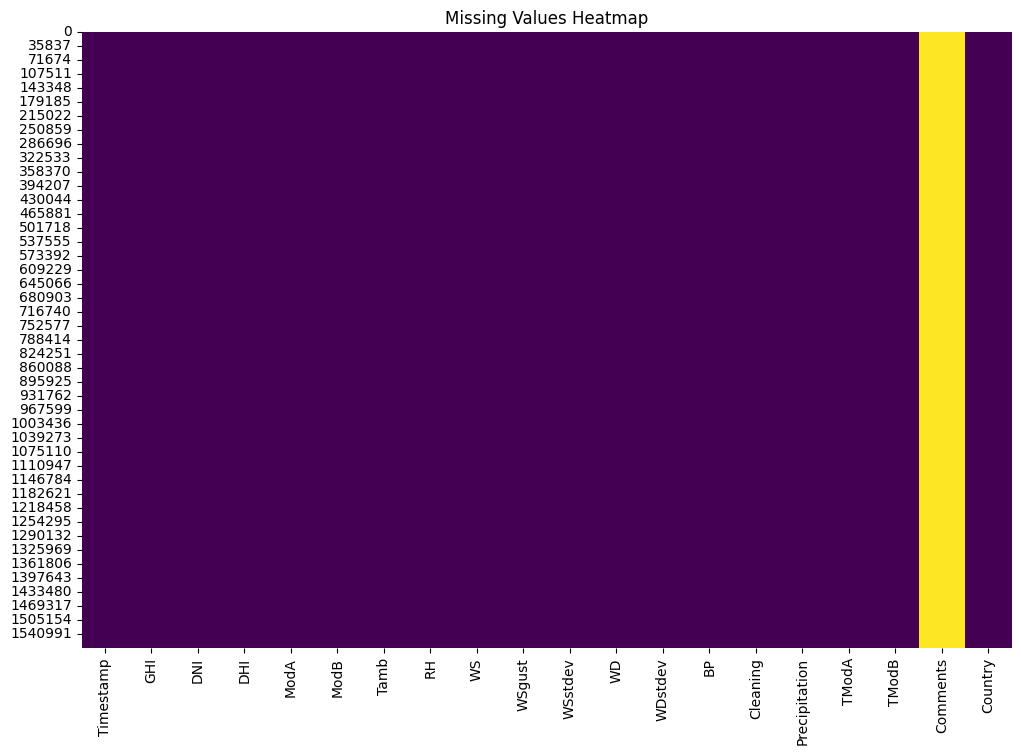

In [53]:
# Missing values

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [54]:
# Since the data have no values for comment column we can handle it by droping it
df_clean = df.dropna()

### Correlation Analysis

In [55]:
# Compute correlation matrix using the cleaned DataFrame
corr_matrix = df_clean.corr()

c:\Users\mekbi\Desktop\Kifiya\week-0\venv\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\mekbi\Desktop\Kifiya\week-0\venv\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


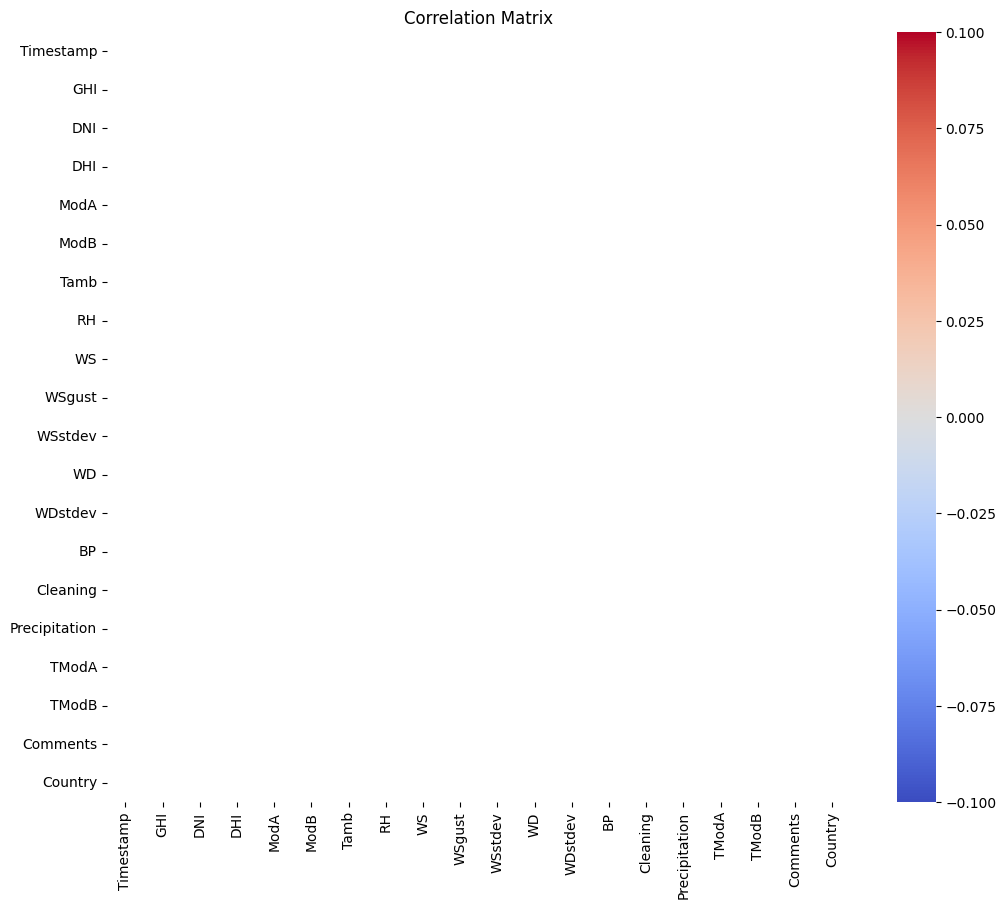

In [56]:
# Visulaize correlation matrix with HeatMap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Wind Analysis

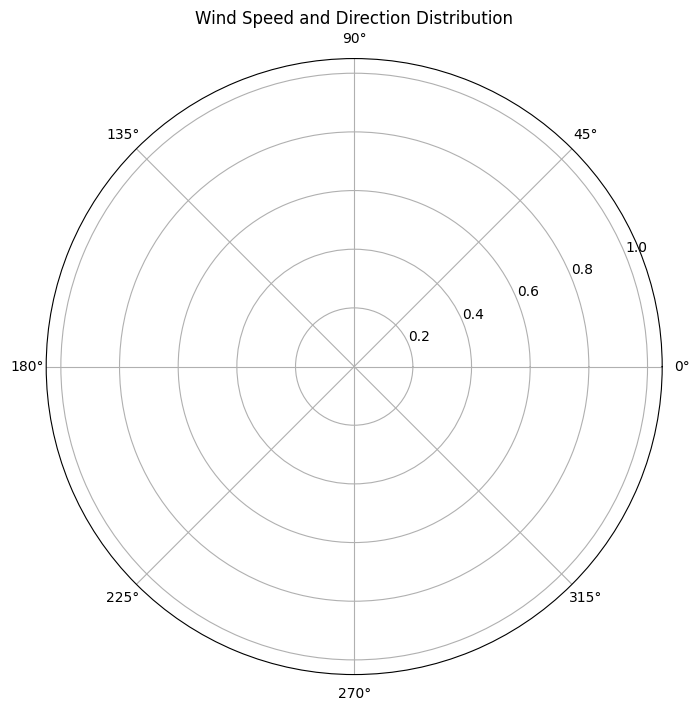

In [57]:
# Polar plot for wind direction and speed
wind_dir_rad = np.deg2rad(df_clean['WD'])
wind_speed = df_clean['WS']

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')
ax.scatter(wind_dir_rad, wind_speed, alpha=0.5)
ax.set_title('Wind Speed and Direction Distribution')
plt.show()

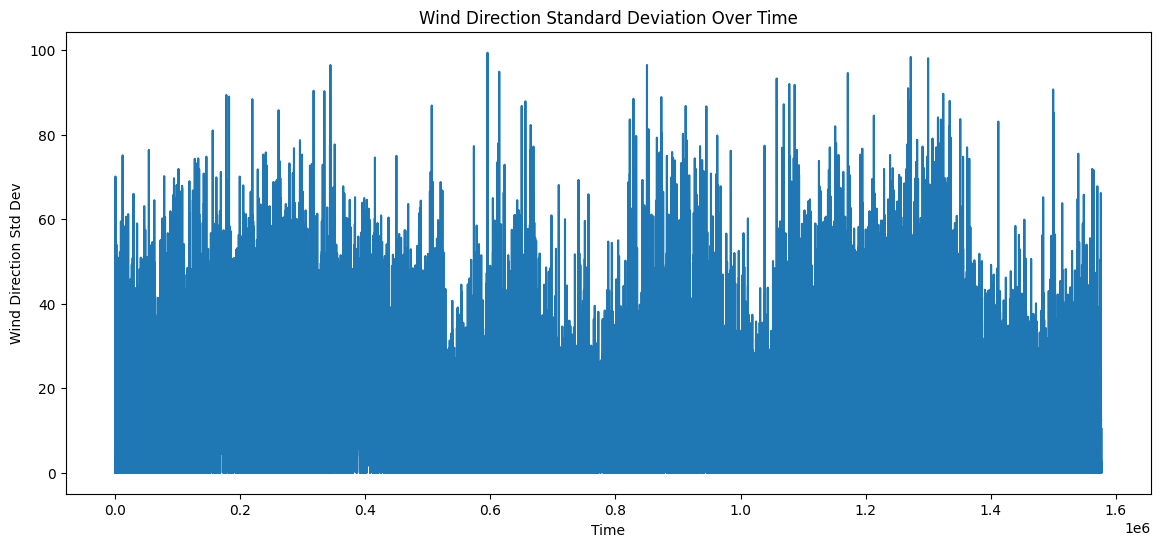

In [63]:
# Wind Direction Variability
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.index, y='WDstdev', data=df)
plt.title('Wind Direction Standard Deviation Over Time')
plt.xlabel('Time')
plt.ylabel('Wind Direction Std Dev')
plt.show()

### Temperature analysis

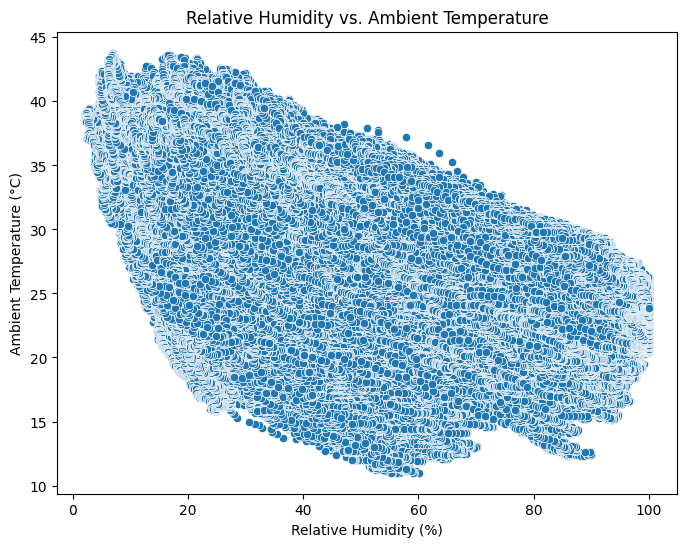

In [66]:
# Relationship Between Relative Humidity and Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.show()

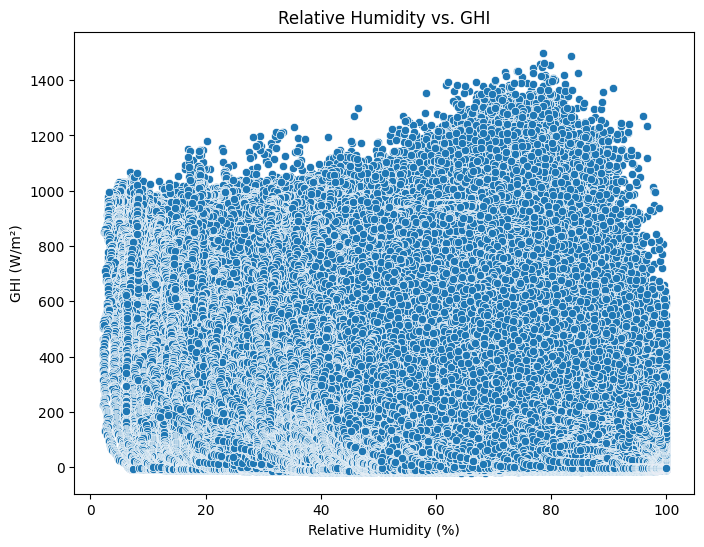

In [68]:
# Impact of Relative Humidity on Solar Radiation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity vs. GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.show()

### Histograms

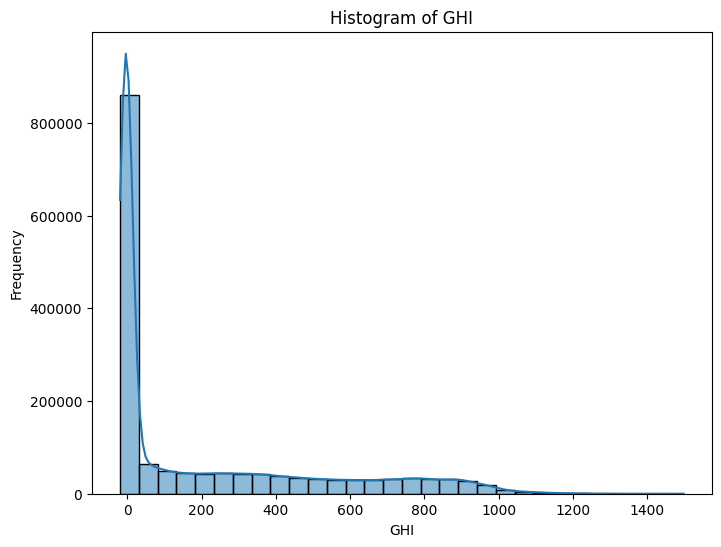

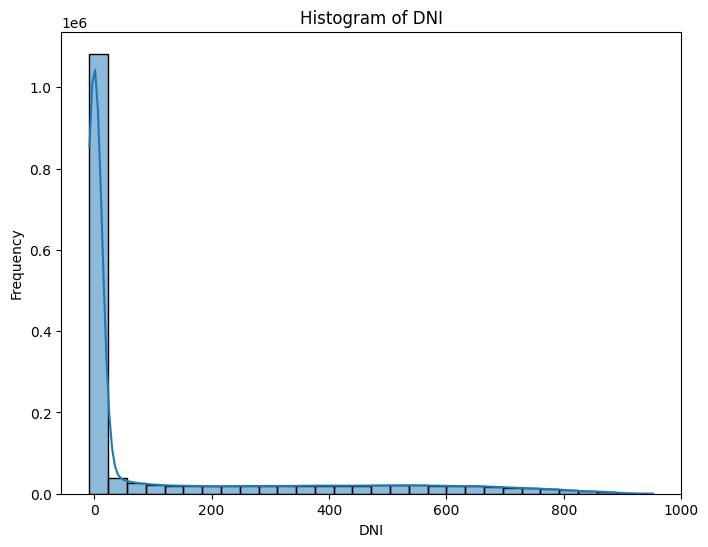

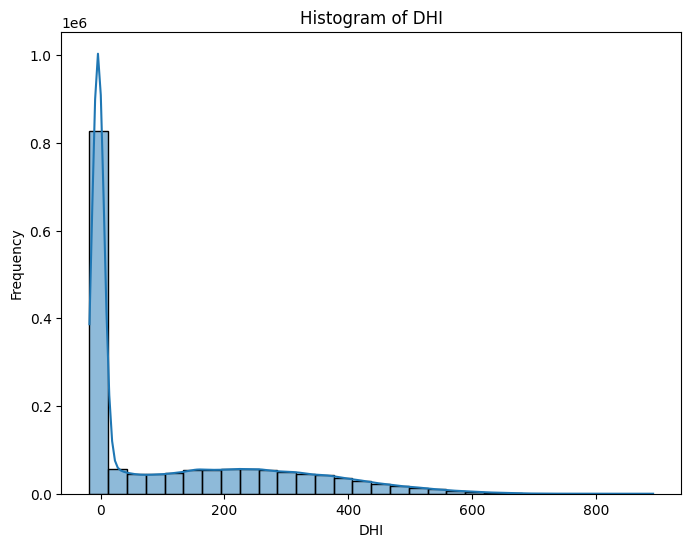

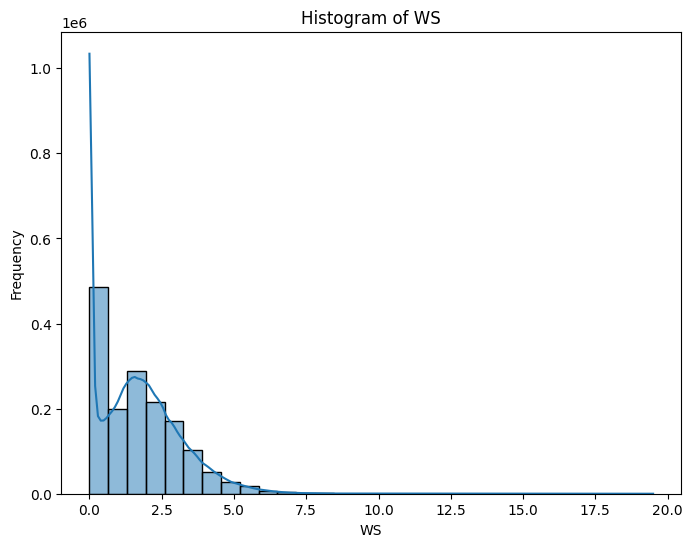

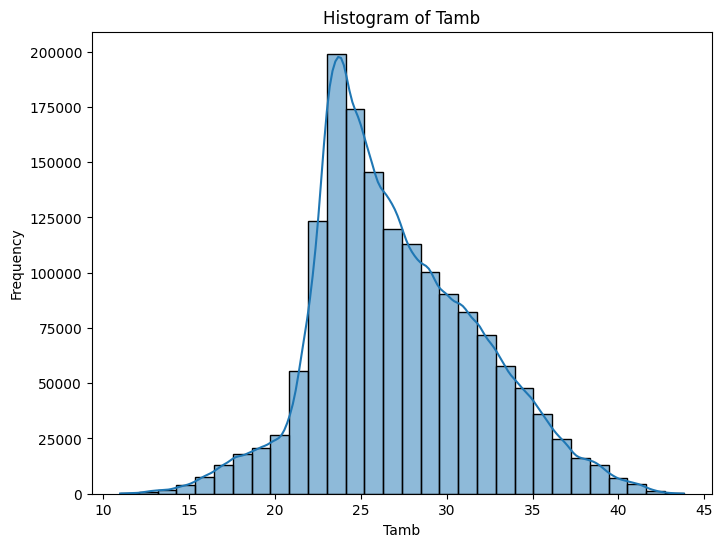

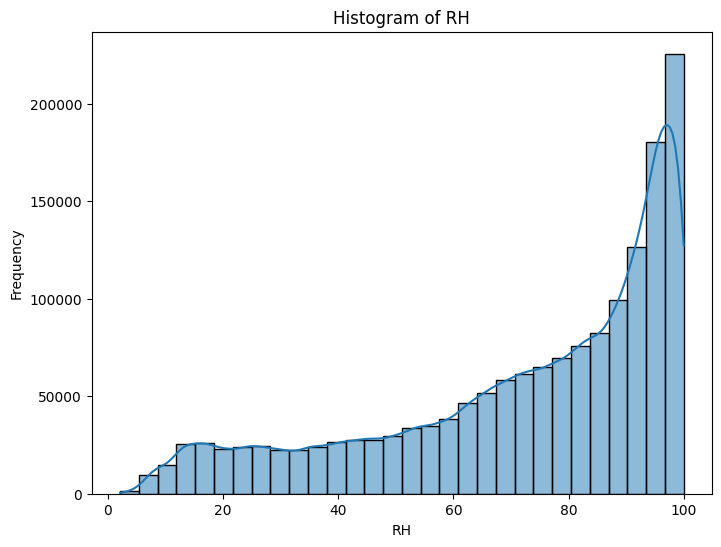

In [69]:
# Visualize Distributions of Key Variables
hist_columns = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'RH']

for col in hist_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Z-score analysis

In [71]:
# Identify outliers using z-scores
from scipy.stats import zscore

key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'WSstdev']
df_z = df.copy()
df_z[key_columns] = df_z[key_columns].apply(zscore)

# Flagging outliers
outliers = (df_z[key_columns].abs() > 3).any(axis=1)
print(f'Number of outliers detected: {outliers.sum()}')

# Optionally, remove outliers
df_cleaned = df[~outliers]

Number of outliers detected: 0


### Bubble charts

C:\Users\mekbi\AppData\Local\Temp\ipykernel_11020\1400756045.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='GHI', y='Tamb', size='RH', data=df, alpha=0.6, palette='viridis', sizes=(20, 200))


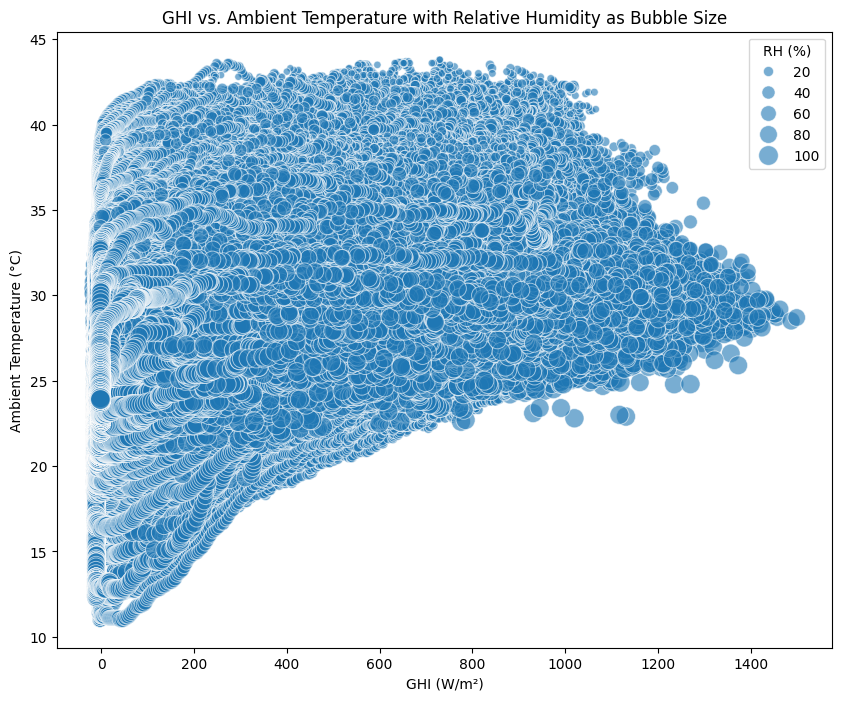

In [72]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='GHI', y='Tamb', size='RH', data=df, alpha=0.6, palette='viridis', sizes=(20, 200))
plt.title('GHI vs. Ambient Temperature with Relative Humidity as Bubble Size')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.legend(title='RH (%)', loc='upper right')
plt.show()